# Visualisation of Pokemon

The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [archive](https://seaborn.pydata.org/archive.html).  Check your Seaborn version below.

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# see what version of Seaborn you have installed so you can find the right documentation
sns.__version__

'0.11.2'

In [4]:
# Read dataset
df = pd.read_csv('data/Pokemon.csv', index_col=0)

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

In [ ]:
tips = sns.load_dataset('tips')

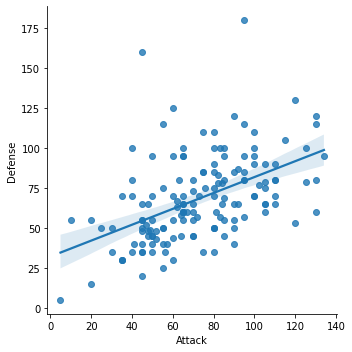

In [10]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df)

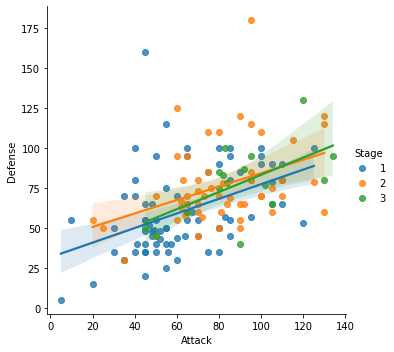

In [13]:
sns.lmplot(x = 'Attack', y = 'Defense', hue = 'Stage', data = df)

<AxesSubplot:>

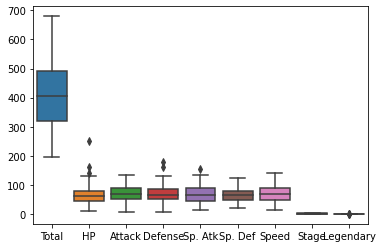

In [14]:
sns.boxplot(data = df)

C:\Users\TChu0702\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

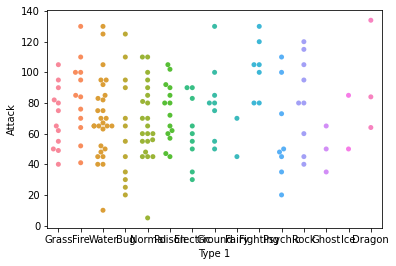

In [16]:
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df)

C:\Users\TChu0702\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack', ylabel='Density'>

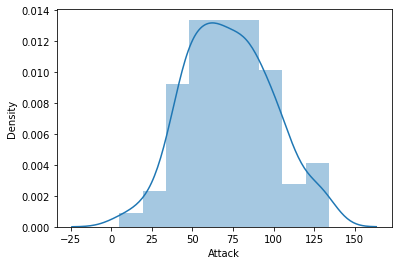

In [17]:
sns.distplot(df.Attack)

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://seaborn.pydata.org/archive/0.10/tutorial/aesthetics.html#seaborn-figure-styles) on that for version 0.10.

C:\Users\TChu0702\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

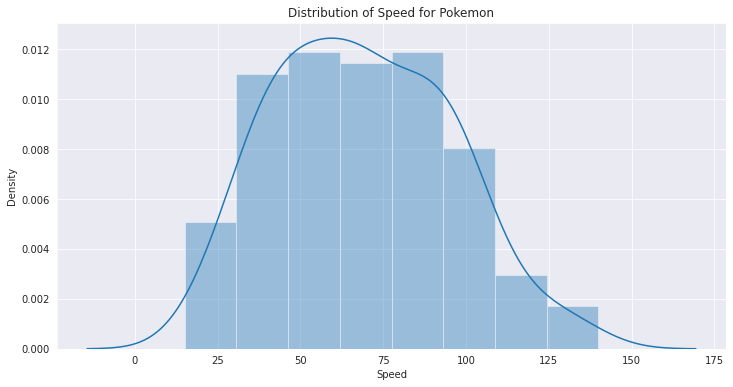

In [6]:
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")

In [18]:
df.groupby('Type 1')['Speed'].sum()

Type 1
Bug          685
Dragon       200
Electric     890
Fairy         95
Fighting     463
Fire        1008
Ghost        285
Grass        625
Ground       465
Ice          180
Normal      1525
Poison       823
Psychic      744
Rock         525
Water       1896
Name: Speed, dtype: int64

In [19]:
df.groupby('Type 1')['Speed'].agg(['sum', 'mean', 'std'])

,sum,mean,std
Type 1,,,
Bug,685,57.083333,26.922307
Dragon,200,66.666667,15.275252
Electric,890,98.888889,28.807310
Fairy,95,47.500000,17.677670
Fighting,463,66.142857,22.063760
Fire,1008,84.000000,16.242481
Ghost,285,95.000000,15.000000
Grass,625,52.083333,14.215602
Ground,465,58.125000,33.159517
